In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# SYSTEM PARAMETERS
# Gantry
m = 2.0               # Mass of mover + gantry (kg)
r = 0.05              # Radius of the wheel/pulley (m)
u_kinetic = 0.7       # Kinetic friction coefficient

# Motor
k_n = 296  # Motor speed constant, rpm/V
speed_torque_gradient = 0.732 # rpm/mNm
voltage = 12 # motor voltage (V)

# Simulation
tf = 0.1 # time to run simulation up to (s)
n_pts = 1000 # number of time points to use in simulation


c1 = 97035.44632786885
c2 = 0.0018300000000000002


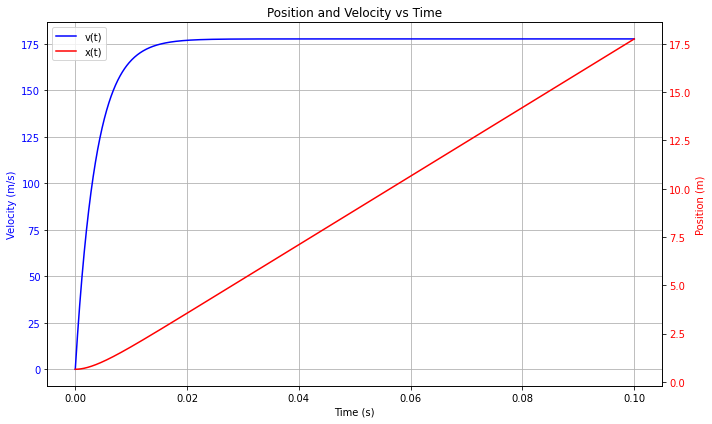

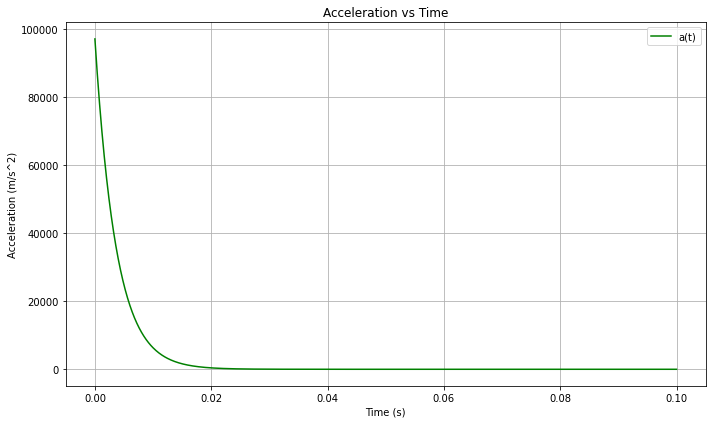

In [7]:
# FUNCTIONS

friction_force = u_kinetic * m * 9.81
c1 = (k_n * voltage) / (speed_torque_gradient * r) - friction_force
c2 = (r ** 2) * speed_torque_gradient

print(f"c1 = {c1}\nc2 = {c2}")

def v_of_t(t):
    return c1 * c2 * (1 - np.exp(-t / (c2 * m)))

def x_of_t(t):
    return c1 * c2 * (t + c2 * m * np.exp(-t / (c2 * m)))

def a_of_t(t):
    v = v_of_t(t)
    return (-v / r + k_n * voltage) * (1 / speed_torque_gradient) * (1 / r) - friction_force

# Time array
t = np.linspace(0, tf, n_pts)

# Calculate function values
v_values = v_of_t(t)
x_values = x_of_t(t)
a_values = a_of_t(t)

# Create Position and Velocity plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot velocity on the primary y-axis
color1 = 'b'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (m/s)', color=color1)
line1 = ax1.plot(t, v_values, color=color1, label='v(t)')
ax1.tick_params(axis='y', labelcolor=color1)

# Create second y-axis and plot position
ax2 = ax1.twinx()
color2 = 'r'
ax2.set_ylabel('Position (m)', color=color2)
line2 = ax2.plot(t, x_values, color=color2, label='x(t)')
ax2.tick_params(axis='y', labelcolor=color2)

# Formatting
plt.title('Position and Velocity vs Time')
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')
ax1.grid(True)
plt.tight_layout()

plt.show()

# separate plot for acceleration
plt.figure(figsize=(10, 6))
plt.plot(t, a_values, 'g-', label='a(t)')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the acceleration plot
plt.show()
